Importing important libraries

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Question : -Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data description

Pre - Processing Technique

In [3]:
#Shape of the data 
df.shape

(50, 5)

In [4]:
# Getting the data type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Handling the missing Values.

In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There are no missing values and data types are correct.

Finding the Coorelation.

In [6]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Data Visualization

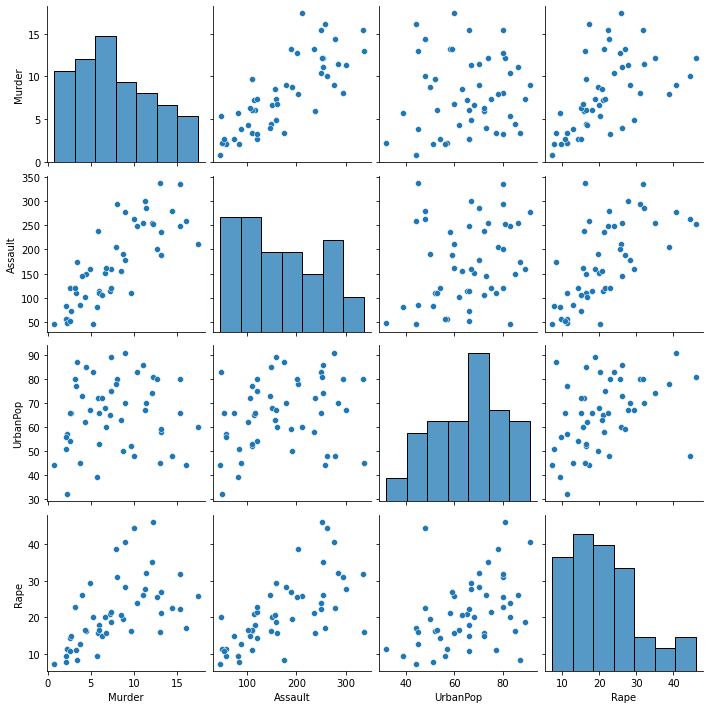

In [7]:
sns.pairplot(df)

## Hierarichal Clustering

In [8]:
#Standardizing the DataFrame
scaler  = StandardScaler()
scaler_df = scaler.fit_transform(df.iloc[:,1:])

#Normalize the DataFrame
normalized_df = normalize(scaler_df)

In [9]:
normalized_df = pd.DataFrame(normalized_df,columns=df.columns[1:])
normalized_df.head()


,Murder,Assault,UrbanPop,Rape
0,0.797407,0.502382,-0.334288,-0.002192
1,0.168146,0.366453,-0.401198,0.822484
2,0.034635,0.715011,0.483014,0.504239
3,0.204249,0.202947,-0.943754,-0.162553
4,0.092541,0.419963,0.584950,0.687677


Plotting the Dendrogram

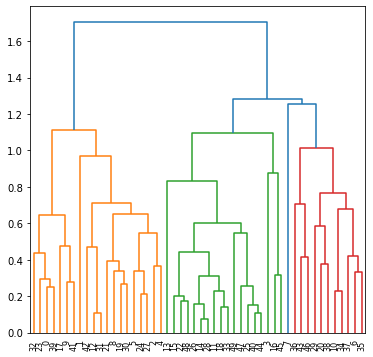

In [10]:
plt.figure(figsize=(6,6))
dendrogram = sch.dendrogram(sch.linkage(normalized_df,method="average"))

Creating the Model

In [11]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="single")

In [12]:
clusters = hc.fit_predict(normalized_df)

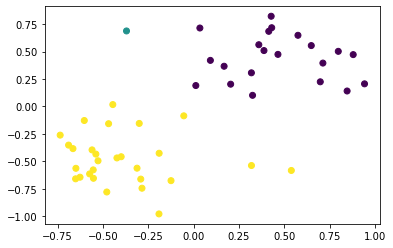

In [13]:
plt.scatter(normalized_df["Murder"],normalized_df["Assault"] , c=clusters)

In [14]:
clusters

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
df["h_cluster_id"] = hc.labels_

In [16]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


## K-Means Clustering

In [17]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df.iloc[:,1:])
y_predicted

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [18]:
df["cluster"] = y_predicted
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,cluster
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,2


In [19]:
km.cluster_centers_

array([[8.21428571e+00, 1.73285714e+02, 7.06428571e+01, 2.28428571e+01,
        1.14285714e+00],
       [4.27000000e+00, 8.75500000e+01, 5.97500000e+01, 1.43900000e+01,
        2.00000000e+00],
       [1.18125000e+01, 2.72562500e+02, 6.83125000e+01, 2.83750000e+01,
        6.25000000e-02]])

In [20]:
sse = []

k_rng = range(1,11)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(normalized_df)
    sse.append(km.inertia_)


In [21]:
sse

[49.62422352326659,
 25.766686930712293,
 18.250358132073625,
 13.496988061841382,
 11.759864626268058,
 9.979815742492132,
 8.340793583744643,
 7.503734940644966,
 6.613794682024688,
 6.027042042905406]

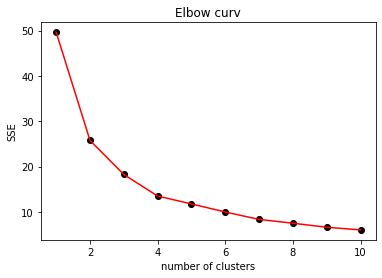

In [22]:
plt.plot(range(1,11),sse, color="red")
plt.scatter(range(1,11),sse, color="black")
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

In [23]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(normalized_df)
model.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 1, 1, 1, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 0, 3, 3, 2, 1, 2, 0, 3,
       1, 2, 3, 1, 1, 1])

In [24]:
x=pd.Series(model.labels_)
df['Clust']=x

In [25]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,cluster,Clust
0,Alabama,13.2,236,58,21.2,0,2,2
1,Alaska,10.0,263,48,44.5,0,2,0
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,0,0,2
4,California,9.0,276,91,40.6,0,2,0


In [26]:
df.iloc[:,1:5].groupby(df.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,10.392857,250.357143,75.357143,32.914286
1,4.175000,88.125000,54.250000,13.306250
2,13.333333,233.888889,54.777778,21.333333
3,5.190909,138.000000,78.272727,17.809091


## DBSCAN Clustering

In [33]:
dbscan_model  =  DBSCAN(eps=2, min_samples=5)
dbscan_model.fit(scaler_df)

DBSCAN(eps=2)

In [34]:
dbscan_model.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [35]:
df["Clusters"] = dbscan_model.labels_
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,cluster,Clust,Clusters
0,Alabama,13.2,236,58,21.2,0,2,2,0
1,Alaska,10.0,263,48,44.5,0,2,0,-1
2,Arizona,8.1,294,80,31.0,0,2,0,0
3,Arkansas,8.8,190,50,19.5,0,0,2,0
4,California,9.0,276,91,40.6,0,2,0,0
5,Colorado,7.9,204,78,38.7,0,0,0,0
6,Connecticut,3.3,110,77,11.1,2,1,3,0
7,Delaware,5.9,238,72,15.8,1,2,3,0
8,Florida,15.4,335,80,31.9,0,2,0,0
9,Georgia,17.4,211,60,25.8,0,0,2,0


In [38]:
# Getting all noise data
df[df["Clusters"]==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,cluster,Clust,Clusters
1,Alaska,10.0,263,48,44.5,0,2,0,-1
